# Afinación de los hiperparámetros de modelos

* *30 min* | Ultima modificación: Junio 22, 2019

En muchos casos, los modelos contienen diferentes hiperparámetros que controlan su configuración y la estimación de los parámetros. Por ejemplo, en el ejemplo del ajuste del polinomio, el grado $n$ es un hiperparámetro. En este tutorial, se presenta como abordar el problema cuando hay más de un hiperparámetro que debe ser ajustado.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.svm import SVC

### Descripción del problema

Se tiene un conjunto de imágenes de 8x8 de dígitos escritos a mano (datos de entrada) y el dígito al que corresponde la imágen. Se desea construir un clasificador que indique a que dígito corresponde una determinada imágen.

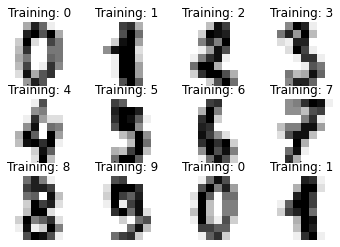

In [2]:
#
# carga el dataset
#
digits = datasets.load_digits()

#
# A continuación se grafican algunas imágenes y los dígitos
# a los que corresponden.
#
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

## Búsqueda exhaustiva usando GridSearchCV()

In [3]:
#
# Separa los datos. X son los pixels de las
# imágenes; y es el dígito.
#
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

#
# Parte los datos en dos conjutos iguales
#
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.5,
    random_state=0,
)

#
# Aca se usara una SVM. Dependiendo del tipo de
# kernel cambian los parámetros que pueden
# ajustarse.
#
# La variable tuned_parameters es una lista de
# diccionarios que contiene los valores que
# pueden ajustarse.
#
tuned_parameters = [
    {
        "kernel": ["rbf"],
        "gamma": [1e-3, 1e-4],
        "C": [1, 10, 100, 1000],
    },
    {
        "kernel": ["linear"],
        "C": [1, 10, 100, 1000],
    },
]

#
# Se definen las métricas de precisión que se usarán.
#
scores = [
    "precision",
    "recall",
]

for score in scores:

    #
    # Construye los clasificadores. SVC es una
    # máquina de vectors de soporte para
    # clasificación. Hay un clasificador por cada
    # conjunto de parámetros (búsqueda 
    # exhaustiva).
    #
    clf = GridSearchCV(
        SVC(),
        tuned_parameters,
        cv=5,
        scoring="%s_macro" % score,
    )

    #
    # Entrenamiento de los clasificadores
    #
    clf.fit(X_train, y_train)

    #
    # La variable clf.best_params_ contiene los mejores parámetros
    # La variable clf.cv_results_ almacena los resultados de la corrida
    #
    stds = clf.cv_results_["std_test_score"]

    #
    # Valores real y pronosticado
    #
    y_true, y_pred = y_test, clf.predict(X_test)
    print(" ")
    print(classification_report(y_true, y_pred))

 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       0.99      0.98      0.98        92
           3       1.00      0.99      0.99        93
           4       1.00      1.00      1.00        76
           5       0.99      0.98      0.99       108
           6       0.99      1.00      0.99        89
           7       0.99      1.00      0.99        78
           8       1.00      0.98      0.99        92
           9       0.99      0.99      0.99        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899

 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       0.99      0.98      0.98        92
           3       1

## Búsqueda aleatoria usando RandomizedSearchCV

In [5]:
import scipy


#
# Los parámetros pueden ser especificados como 
# una lista de valores (tal como en el caso 
# anterior) o como una distribución de 
# probabilidades.
#
tuned_parameters = [
    {
        "kernel": ["rbf"],
        "gamma": scipy.stats.expon(scale=.1),
        "C": scipy.stats.expon(scale=100),
    },
    {
        "kernel": ["linear"],
        "C": [1, 10, 100],
    },
]

for score in scores:

    clf = RandomizedSearchCV(
        estimator=SVC(),
        param_distributions=tuned_parameters,
        n_iter=10,
        cv=5,
        scoring="%s_macro" % score,
        refit=True,
        random_state=12345,
    )

    #
    # Entrenamiento de los clasificadores
    #
    clf.fit(X_train, y_train)

    #
    # La variable clf.best_params_ contiene los mejores parámetros
    # La variable clf.cv_results_ almacena los resultados de la corrida
    #
    stds = clf.cv_results_["std_test_score"]

    #
    # Valores real y pronosticado
    #
    y_true, y_pred = y_test, clf.predict(X_test)
    print(" ")
    print(classification_report(y_true, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       1.00      0.98      0.99        92
           3       0.99      0.99      0.99        93
           4       0.99      1.00      0.99        76
           5       0.99      0.97      0.98       108
           6       0.99      0.98      0.98        89
           7       0.99      1.00      0.99        78
           8       0.97      0.96      0.96        92
           9       0.98      0.99      0.98        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899

 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       1.00      0.98      0.99        92
           3       0